In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gp
from shapely.geometry import Point, Polygon

In [25]:
# Counties shape files


us_counties = gp.read_file(r'\Users\mhardika\Documents\AMO\GeoToolAll_Methods\GeoData\US_County_Boundaries\US_CountyBndrys.shp')
# us_counties = gp.read_file('\US_County_Boundaries\US_CountyBndrys.shp')
us_counties = us_counties.to_crs("EPSG:4326")

# Georgia data
ga_data = pd.read_csv(r'\Users\mhardika\Documents\AMO\2050\analysis_files\georgia_data.csv')
# ga_data = pd.read_csv('\georgia_data.csv')


In [26]:
# Total energy for surface water treatment
total_energy = 0.107+525/3785.4118 + 0.0383
ga_data.head()

,county,baseline_mgd,baseline_m3/day,baseline_energy_kwh/day,demand_mgd_2040,demand_m3/day_2040,demand_energy_2040_kwh/day,demand_mgd_2060,demand_m3/day_2060,demand_energy_2060_kwh/day
0,Bartow,10.5,39894.9,11330.1,28.5,107883.90,30639.0,37.00,140059.80,39775.58260
1,Cherokee,25.1,95105.2,27009.9,28.1,106369.74,30209.0,34.20,129460.68,36765.53851
2,Clayton,28.5,107764.4,30605.1,32.5,123025.50,34939.2,43.10,163150.74,46333.17865
3,Cobb,74.9,283559.2,80530.8,93.3,353177.82,100302.5,111.90,423586.26,120294.26200
4,Coweta,14.4,54653.8,15521.7,20.7,78357.78,22253.6,24.15,91417.41,25961.63027


In [27]:
ga_counties = us_counties[us_counties['STATEFP']=='13'].copy()
ga_counties.reset_index(inplace=True)
ga_counties.head(2)

,index,OBJECTID,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,...,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,SHAPE_Leng,SHAPE_Area,geometry
0,15,16,13,189,00348794,13189,McDuffie,McDuffie County,06,H1,...,12260,None,A,6.668166e+08,23116292.0,+33.4824637,-082.4731880,1.475905,0.06693,"POLYGON ((-82.44998 33.34051, -82.45000 33.340..."
1,52,53,13,025,00351605,13025,Brantley,Brantley County,06,H1,...,15260,None,A,1.145716e+09,12532588.0,+31.1973339,-081.9829779,2.072011,0.10961,"POLYGON ((-81.91012 31.34722, -81.90993 31.347..."


In [28]:
geometry_col = []

for county in ga_data['county'].unique():
    idx = ga_counties[ga_counties['NAME']==county].index.values[0]
    # print(idx)
    geometry = ga_counties.iloc[idx]['geometry']
    # print(geometry)
    geometry_col.append(geometry)

ga_data['geometry'] = geometry_col
ga_data.head()

,county,baseline_mgd,baseline_m3/day,baseline_energy_kwh/day,demand_mgd_2040,demand_m3/day_2040,demand_energy_2040_kwh/day,demand_mgd_2060,demand_m3/day_2060,demand_energy_2060_kwh/day,geometry
0,Bartow,10.5,39894.9,11330.1,28.5,107883.90,30639.0,37.00,140059.80,39775.58260,POLYGON ((-85.02329499999996 34.31693200000007...
1,Cherokee,25.1,95105.2,27009.9,28.1,106369.74,30209.0,34.20,129460.68,36765.53851,POLYGON ((-84.65586299999995 34.21390500000007...
2,Clayton,28.5,107764.4,30605.1,32.5,123025.50,34939.2,43.10,163150.74,46333.17865,POLYGON ((-84.45855599999999 33.59443600000003...
3,Cobb,74.9,283559.2,80530.8,93.3,353177.82,100302.5,111.90,423586.26,120294.26200,POLYGON ((-84.72422999999998 33.90359600000005...
4,Coweta,14.4,54653.8,15521.7,20.7,78357.78,22253.6,24.15,91417.41,25961.63027,POLYGON ((-84.94898799999999 33.25123000000008...


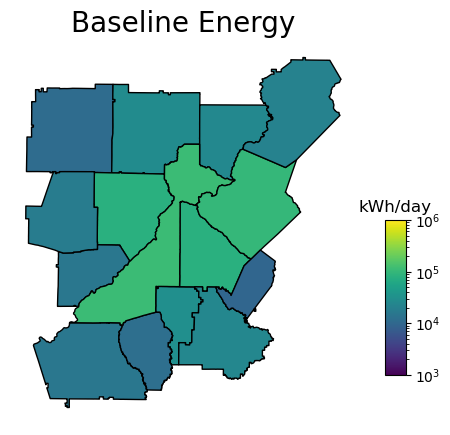

In [29]:
geodf = gp.GeoDataFrame(ga_data,crs="EPSG:4326", geometry=ga_data['geometry'])

vmin,vmax = geodf['baseline_energy_kwh/day'].min(), geodf['baseline_energy_kwh/day'].max()

norm = mpl.colors.LogNorm(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(norm=norm)


fig, ax = plt.subplots(figsize=(7,5))
ax.axis('off')

# Add this to include other counties in Georgia
# ga_counties.plot(ax=ax,edgecolor='black',facecolor='white')
geodf.plot(ax = ax , column = geodf['baseline_energy_kwh/day'], edgecolor='black',norm=norm)

# Set title
ax.set_title('Baseline Energy',fontdict={'fontsize': '20', 'fontweight' : '1'})

# Create colorbar legend
fig = ax.get_figure()
cbax = fig.add_axes([0.8, 0.21, 0.03, 0.31])  
cbax.set_title('kWh/day')
fig.colorbar(sm, cax=cbax)
sm.set_clim(1e3,1e6)

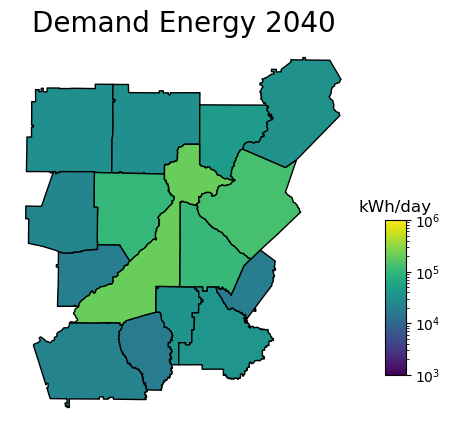

In [30]:
geodf = gp.GeoDataFrame(ga_data,crs="EPSG:4326", geometry=ga_data['geometry'])

vmin,vmax = geodf['demand_energy_2040_kwh/day'].min(), geodf['demand_energy_2040_kwh/day'].max()

norm = mpl.colors.LogNorm(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(norm=norm)


fig, ax = plt.subplots(figsize=(7,5))
ax.axis('off')

# Add this to include other counties in Georgia
# ga_counties.plot(ax=ax,edgecolor='black',facecolor='white')
geodf.plot(ax = ax , column = geodf['demand_energy_2040_kwh/day'], edgecolor='black',norm=norm)

# Set title
ax.set_title('Demand Energy 2040',fontdict={'fontsize': '20', 'fontweight' : '1'})

# Create colorbar legend
fig = ax.get_figure()
cbax = fig.add_axes([0.8, 0.21, 0.03, 0.31])  
cbax.set_title('kWh/day')
fig.colorbar(sm, cax=cbax)
sm.set_clim(1e3,1e6)

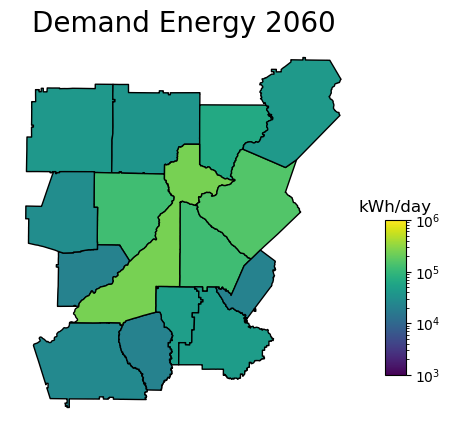

In [31]:
geodf = gp.GeoDataFrame(ga_data,crs="EPSG:4326", geometry=ga_data['geometry'])

vmin,vmax = geodf['demand_energy_2060_kwh/day'].min(), geodf['demand_energy_2060_kwh/day'].max()

norm = mpl.colors.LogNorm(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(norm=norm)


fig, ax = plt.subplots(figsize=(7,5))
ax.axis('off')

# Add this to include other counties in Georgia
# ga_counties.plot(ax=ax,edgecolor='black',facecolor='white')
geodf.plot(ax = ax , column = geodf['demand_energy_2060_kwh/day'], edgecolor='black',norm=norm)

# Set title
ax.set_title('Demand Energy 2060',fontdict={'fontsize': '20', 'fontweight' : '1'})

# Create colorbar legend
fig = ax.get_figure()
cbax = fig.add_axes([0.8, 0.21, 0.03, 0.31])  
cbax.set_title('kWh/day')
fig.colorbar(sm, cax=cbax)
sm.set_clim(1e3,1e6)